In [ ]:
from google.colab import drive
import numpy as np
from scipy.sparse import dok_matrix
import networkx as nx

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/stanford-graphs/
% ls

/content/drive/MyDrive/stanford-graphs
web-Stanford.txt


PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.


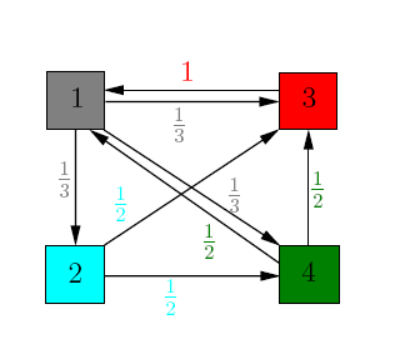

In [ ]:
A = np.array([
  [0, 0, 1, 1],
  [1, 0, 0, 0],
  [1, 1, 0, 1],
  [1, 1, 0, 0],
])
A = A/np.sum(A, axis=0)
v = np.array([1, 1, 1, 1])
v = v/np.sum(v)
v = v.reshape((4, 1))
A

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [ ]:
A

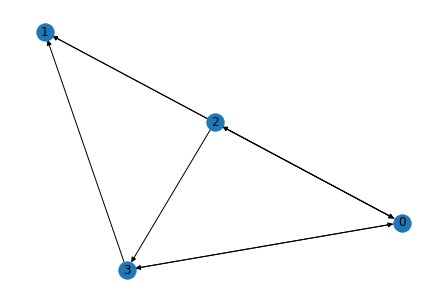

In [ ]:
G = nx.DiGraph()
for ii, i in enumerate(A):
  for jj, j in enumerate(i):
    if j>0:
      G.add_edge(ii, jj, weight=j)
nx.draw(G, with_labels=True)   

In [ ]:
v = [0.25, 0.25, 0.25, 0.25]
while True:
  new_v = A @ v
  if np.allclose(new_v, v):
    break
  v = new_v
  print(v)
v

[0.375      0.08333333 0.33333333 0.20833333]
[0.4375     0.125      0.27083333 0.16666667]
[0.35416667 0.14583333 0.29166667 0.20833333]
[0.39583333 0.11805556 0.29513889 0.19097222]
[0.390625   0.13194444 0.28645833 0.19097222]
[0.38194444 0.13020833 0.29166667 0.19618056]
[0.38975694 0.12731481 0.29050926 0.19241898]
[0.38671875 0.12991898 0.28978588 0.19357639]
[0.38657407 0.12890625 0.29065394 0.19386574]
[0.38758681 0.12885802 0.29024402 0.19331115]
[0.38689959 0.1291956  0.29028019 0.19362461]
[0.3870925  0.12896653 0.29037664 0.19356433]
[0.38715881 0.12903083 0.29029626 0.1935141 ]
[0.38705331 0.12905294 0.2903254  0.19356835]
[0.38710958 0.12901777 0.29032841 0.19354424]
[0.38710053 0.12903653 0.29031753 0.19354541]
[0.38709024 0.12903351 0.29032448 0.19355177]
[0.38710037 0.12903008 0.29032272 0.19354683]
[0.38709614 0.12903346 0.29032191 0.19354849]
[0.38709616 0.12903205 0.29032302 0.19354877]


array([0.38709616, 0.12903205, 0.29032302, 0.19354877])

In [ ]:
[0.36815162, 0.14180823, 0.2879621 , 0.20207804]

In [ ]:
A = np.array([
  [0, 0, 1, 1],
  [1, 0, 0, 0],
  [1, 1, 0, 1],
  [1, 1, 0, 0],
])
D = np.linalg.inv(np.diag([3, 2, 1, 2]))
H = A @ D
# A @ D


v = np.array([1, 1, 1, 1])
N = len(v)
v = v/np.sum(v)
damping_factor = 0.85
iters = 0
while True:
  print("H@V:: ", H @ v)
  # new_v = H @ v # OLD
  new_v = damping_factor * (H @ v) + np.ones(N)*(1-damping_factor)/N
  print("new_v +", new_v)
  iters+=1
  if np.allclose(new_v, v):
    break
  v = new_v
iters, v

H@V::  [0.375      0.08333333 0.33333333 0.20833333]
new_v  [0.35625    0.10833333 0.32083333 0.21458333]
H@V::  [0.428125   0.11875    0.28020833 0.17291667]
new_v  [0.40140625 0.1384375  0.27567708 0.18447917]
H@V::  [0.36791667 0.13380208 0.29526042 0.20302083]
new_v  [0.35022917 0.15123177 0.28847135 0.21006771]
H@V::  [0.39350521 0.11674306 0.2973928  0.19235894]
new_v  [0.37197943 0.1367316  0.29028388 0.2010051 ]
H@V::  [0.39078643 0.12399314 0.29286149 0.19235894]
new_v  [0.36966846 0.14289417 0.28643227 0.2010051 ]
H@V::  [0.38693482 0.12322282 0.29517246 0.19466991]
new_v  [0.36639459 0.1422394  0.28839659 0.20296942]
H@V::  [0.3898813  0.12213153 0.29473594 0.19325123]
new_v  [0.3688991  0.1413118  0.28802555 0.20176355]
H@V::  [0.38890732 0.12296637 0.29450404 0.19362227]
new_v  [0.36807122 0.14202141 0.28782844 0.20207893]
H@V::  [0.3888679  0.12269041 0.29474058 0.19370111]
new_v  [0.36803771 0.14178685 0.28802949 0.20214595]
H@V::  [0.38910247 0.12267924 0.29464564 0.193

(16, array([0.36815162, 0.14180823, 0.2879621 , 0.20207804]))

In [ ]:
# now for the big file
G = nx.DiGraph()
dims = 281903
sparce_matrix = dok_matrix((dims, dims), dtype=np.float32)
D = np.zeros(dims)
with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, can be done by putting condition of '#' but why check thousand times!
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    G.add_edge(start_node, end_node)
    D[start_node-1] = D[start_node-1] + 1
with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, can be done by putting condition of '#' but why check thousand times!
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    sparce_matrix[start_node-1, end_node-1] = 1/D[start_node-1]
sparce_matrix = sparce_matrix.tocsr()

In [ ]:
nx.draw(G, with_labels=True)   

In [ ]:
def get_ranks(H, v, N, dangling_factor=0.85):
  iters = 0
  while True:
    new_v = dangling_factor * (H @ v) + (1-dangling_factor)/N
    # print(new_v)
    iters+=1
    if np.allclose(new_v, v):
      break
    v = new_v
  print(iters)
  print(v)
  return v
v = np.ones(dims)/dims
z = get_ranks(sparce_matrix, v, dims)

37
[3.54731947e-06 3.54715507e-06 3.48797011e-06 ... 3.54665501e-06
 3.54682833e-06 3.53805941e-06]


In [ ]:
np.sum(z)

0.997621010253663